# Predict whether a customer would be interested in Vehicle Insurance

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of Vehicle Insurance prediction **classification**.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

Since we already have a dataset, we'll approach the problem with the framework steps.

More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of vehicle insurance, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="images/tooling.png" width=800/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a customer can buy the vehicle insurance based on a number of different parameters at a considerable accuracy. 

You'll also be able to describe which parameters are more indicative than others, for example, gender may be more important than age.

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of different **features** (pieces of information) about a customer to predict whether they buy vehicle insurance or not.

In a statement,

> Given personal and vehicle parameters about a customer, can we predict whether or not they an buy vehicle insurance?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Kaggle](https://www.kaggle.com/arashnic/imbalanced-data-practice).

The original database contains 11 attributes, also called **features** what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a customer personal data and vehicle attributes and the dependent variable is whether or not they can buy insurance.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 85% accuracy at predicting whether or not a customer can buy the vehicle insurance during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Vehicle Insurance Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (interested or not interested in Vehicle Insurance).

We have information about:

Demographics (gender, age, region code type),
Vehicles (Vehicle Age, Damage),
Policy (Premium, sourcing channel) etc.
target:Response

Following are categorical columns:

Gender	[Male, Female]

Vehicle_Age	[< 1 Year, 1-2 Year, > 2 Years]

Vehicle_Damage	[No, Yes]

Driving_License	[1, 0]

Region_Code	[7.0, 28.0, 33.0, 46.0, 25.0, 8.0, 41.0, 39.0,...]

Previously_Insured	[1, 0]

Policy_Sales_Channel	[152.0, 26.0, 124.0, 122.0, 158.0, 157.0, 156....]


**Note:** No personal identifiable information (PPI) can be found in the dataset.


## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [3]:
# Regular EDA and plotting libraries
import numpy as np; print("numpy", np.__version__)# np is short for numpy
import pandas as pd; print("pandas", pd.__version__)# pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt; 
import seaborn as sns # seaborn gets shortened to sns
import sklearn; print("Scikit-Learn", sklearn.__version__)

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

numpy 1.19.2
pandas 1.2.2
Scikit-Learn 0.24.1


## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file. You'll likely use this a lot.

In [4]:
df = pd.read_csv("data/car_insurance_train.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(382154, 12)

## Data Exploration (exploratory data analysis or EDA)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your **data dictionary** and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [6]:
# And the top 10
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

In [8]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.Response.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

Since these two values are not close to even, our `Response` column can be considered **unbalanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

**before we fix our train data to make it balanced, we will do some more exploration with the dataset.**

If you'd prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true.

In [10]:
# Normalized value counts
df.Response.value_counts(normalize=True)

0    0.836189
1    0.163811
Name: Response, dtype: float64

That shows our train dataset have only 16% positive response vs 83.6% negative response. if we use this dataset for training than our model will be very much biased toward customers who do not want to buy the vehicle insurance. 

**We will fix that soon...but before that lets create some more representations of our data**

We can plot the Response column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

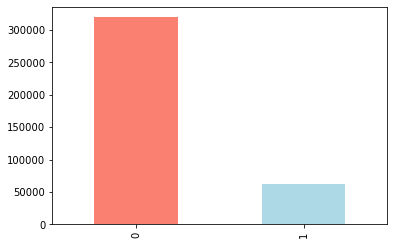

In [11]:
# Plot the value counts with a bar graph
df.Response.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


Another way to get some quick insights on your dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [13]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Vehicle Insurance data according to Gender

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our Response column with the Gender column. 

Remember from our data dictionary, for the Response column, 1 = interested in insurance, 0 = not interested in insurance . And for Gender, 1 = male, 0 = female.

In [14]:
df.Gender.value_counts()

Male      205603
Female    176551
Name: Gender, dtype: int64

In [17]:
# Compare Response column with Gender column
pd.crosstab(df.Response, df.Gender)

Gender,Female,Male
Response,,
0,152347,167206
1,24204,38397


In [19]:
# Compare Response column with Gender column in %
pd.crosstab(df.Response, df.Gender).apply(lambda r: r/r.sum(), axis=0)

Gender,Female,Male
Response,,
0,0.862906,0.813247
1,0.137094,0.186753


### Making our crosstab visual
You can plot the crosstab by using the `plot()` function and passing it a few parameters such as, `kind` (the type of plot you want), `figsize=(length, width)` (how big you want it to be) and `color=[colour_1, colour_2]` (the different colours you'd like to use).

Different metrics are represented best with different kinds of plots. In our case, a bar graph is great. We'll see examples of more later. And with a bit of practice, you'll gain an intuition of which plot to use with different variables.

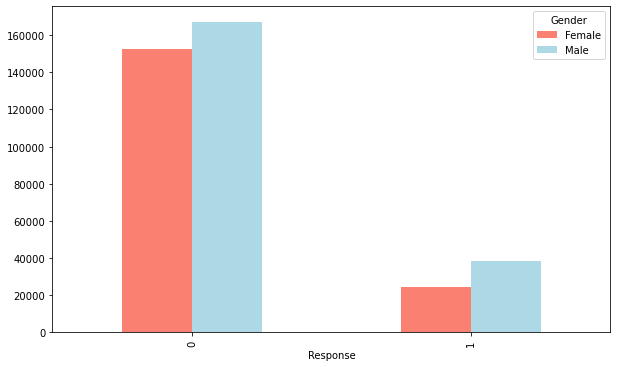

In [20]:
# Create a plot
pd.crosstab(df.Response, df.Gender).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

Nice! But our plot is looking pretty bare. Let's add some attributes.

We'll create the plot again with `crosstab()` and `plot()`, then add some helpful labels to it with `plt.title()`, `plt.xlabel()` and more.

To add the attributes, you call them on `plt` within the same cell as where you make create the graph.

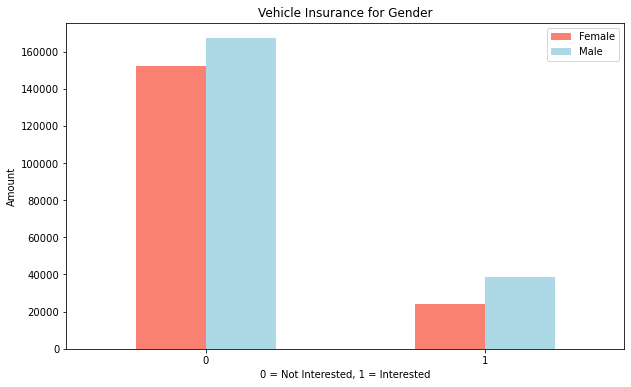

In [21]:
# Create a plot
pd.crosstab(df.Response, df.Gender).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Vehicle Insurance for Gender")
plt.xlabel("0 = Not Interested, 1 = Interested")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Customer Age vs Annual Premium for Insurance

Let's try combining a couple of independent variables, such as, `Age` and `Annual_Premium` and then comparing them to our Response variable `interested in insurance?`.

Because there are so many different values for `Age` and `Annual_Premium`, we'll use a scatter plot.

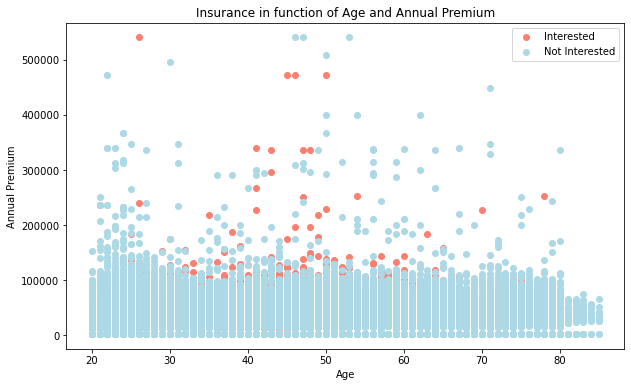

In [29]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.Age[df.Response==1], 
            df.Annual_Premium[df.Response==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.Age[df.Response==0], 
            df.Annual_Premium[df.Response==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Insurance in function of Age and Annual Premium")
plt.xlabel("Age")
plt.legend(["Interested", "Not Interested"])
plt.ylabel("Annual Premium");

What can we infer from this?

It seems that higher premium are more likely to get the premium.

Let's check the age **distribution**.

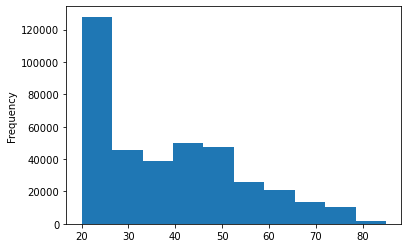

In [31]:
# Histograms are a great way to check the distribution of a variable
df.Age.plot.hist();

We can see it's a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) but slightly swaying to the right, which reflects in the scatter plot above.


### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [32]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.026517,0.005573,0.001759,0.095418,0.014814,-0.004026,-0.001321,0.166621
Age,-0.026517,1.000000,-0.078071,0.043728,-0.264060,0.065090,-0.582300,0.000669,0.133149
Driving_License,0.005573,-0.078071,1.000000,-0.000675,0.012489,-0.011149,0.040493,-0.000132,0.013250
Region_Code,0.001759,0.043728,-0.000675,1.000000,-0.022987,-0.010142,-0.041908,-0.000627,0.011289
Previously_Insured,0.095418,-0.264060,0.012489,-0.022987,1.000000,-0.001565,0.241127,0.002723,-0.431224
Annual_Premium,0.014814,0.065090,-0.011149,-0.010142,-0.001565,1.000000,-0.114864,-0.001349,0.030777
Policy_Sales_Channel,-0.004026,-0.582300,0.040493,-0.041908,0.241127,-0.114864,1.000000,-0.001550,-0.184514
Vintage,-0.001321,0.000669,-0.000132,-0.000627,0.002723,-0.001349,-0.001550,1.000000,-0.001884
Response,0.166621,0.133149,0.013250,0.011289,-0.431224,0.030777,-0.184514,-0.001884,1.000000


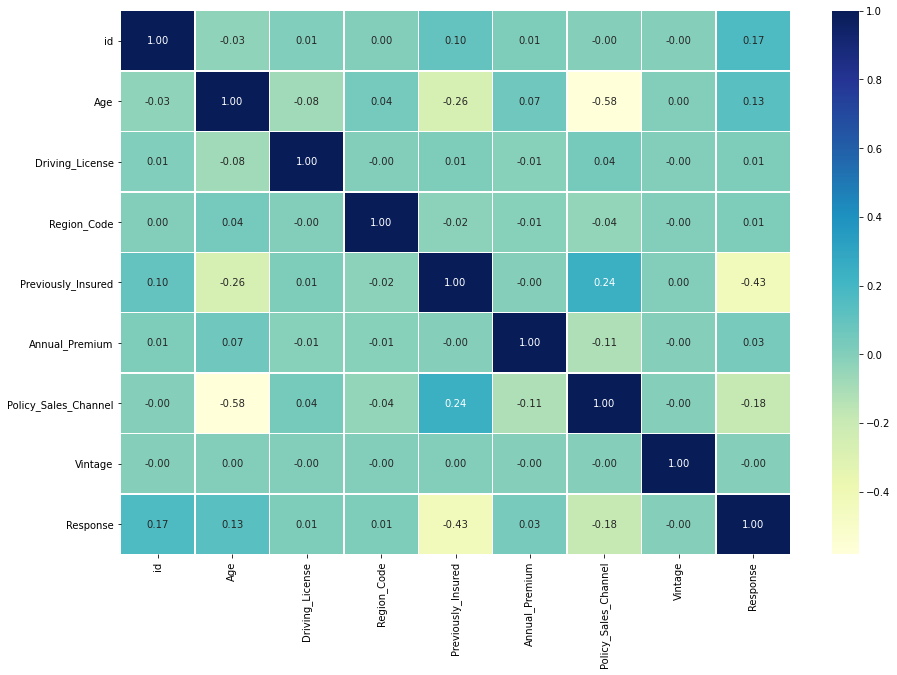

In [33]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

### Enough EDA, let's model

Remember, we do exploratory data analysis (EDA) to start building an intuition of the dataset.

So what we'll do next is **model driven EDA**, meaning, we'll use machine learning models to drive our next questions.

A few extra things to remember:

* Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular dataset.
* You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data, I encourage you to look at more.
* We want to quickly find:
    * Distributions (`df.column.hist()`)
    * Missing values (`df.info()`)
    * Outliers

Let's build some models.

---

#### Finding Null, Converting string into categories and categories into numeric values

Machine learning work with the data that is in numbers, but not all of our data values are numbers, like Gender, Vehicle_Age, Vehicle_Damage are string columns.


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


As you can see that Gender, Vehicle_Age and Vehicle_Damage are all objects.


Next, we will convert object data types into categories. Categories will turn enumeration like Male, Female into number like 1, 0.

In [46]:
# Check columns which *aren't* numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Gender
Vehicle_Age
Vehicle_Damage


In [47]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    382154 non-null  int64   
 1   Gender                382154 non-null  category
 2   Age                   382154 non-null  int64   
 3   Driving_License       382154 non-null  int64   
 4   Region_Code           382154 non-null  float64 
 5   Previously_Insured    382154 non-null  int64   
 6   Vehicle_Age           382154 non-null  category
 7   Vehicle_Damage        382154 non-null  category
 8   Annual_Premium        382154 non-null  float64 
 9   Policy_Sales_Channel  382154 non-null  float64 
 10  Vintage               382154 non-null  int64   
 11  Response              382154 non-null  int64   
dtypes: category(3), float64(3), int64(6)
memory usage: 27.3 MB


All 3 object data types are now categories. 

In [48]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df[label] = pd.Categorical(content).codes+1

There are couple of things we have done:

1. Loop through the list of columns that are not numeric, Gander, Vehicle_Age and Vehicle_Damage
2. Checking if they have any Null value, if so then we are creating new column to indicate that.
3. Finally, converting those three category columns into numbers

In [49]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_is_missing,Vehicle_Age_is_missing,Vehicle_Damage_is_missing
0,167647,2,22,1,7.0,1,2,1,2630.0,152.0,16,0,False,False,False
1,17163,2,42,1,28.0,0,1,2,43327.0,26.0,135,0,False,False,False
2,32023,1,66,1,33.0,0,1,2,35841.0,124.0,253,0,False,False,False
3,87447,1,22,1,33.0,0,2,1,27645.0,152.0,69,0,False,False,False
4,501933,2,28,1,46.0,1,2,1,29023.0,152.0,211,0,False,False,False



At this point we have all our data converted into numbers. we ca now start preparing for building model. 

The first thing we need for our model is the train and test set. 


### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the insurance company and start using it on their customers. How would you know how well your model goes on a new customers not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

If you remember from EDA, that our data set was identified as a unbalanced due to the fact that we have 83% not interested vs only 16% interested customer data. we have fix that before we create our train ad test data set. 

Let's do that...

### Resampling Methods

you can find several resources and kaggle notebooks for understanding resampling methods  and fundamentals, but the summary is that:
    
>*The main motivation behind the need to preprocess imbalanced data before we feed them into a classifier is that typically classifiers are more sensitive to detecting the majority class and less sensitive to the minority class.* *Thus, if we don't take care of the issue, the classification output will be biased, in many cases resulting in always predicting the majority class. Many methods have been proposed in the past few years to deal with imbalanced data.*


![](https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png)

#### SMOTE

In SMOTE (Synthetic Minority Oversampling Technique) we synthesize elements for the minority class, in the vicinity of already existing elements.
At a high level, SMOTE creates synthetic observations of the minority class [0] by:

- Finding the k-nearest-neighbors for minority class observations (finding similar observations)
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

![](https://miro.medium.com/max/734/0*_XpwY9GznmejI4WN.png)

#### Tomek Links

In this algorithm, we end up removing the majority element from the Tomek link, which provides a better decision boundary for a classifier.

![](https://miro.medium.com/max/798/0*YWVxE7SbWKnTnbZi)

This is relay good resource to find an overview of most popular methods and advantage and disadvantage here:

[Imbalanced Data : How to handle Imbalanced Classification Problems](https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/)

In [53]:
# shuffle the dataset so that we have spread out data 
df = df.sample(frac=1)

# Drop reponse column as that will be the label model need to predict and assign all other columns into X
X = df.drop("Response",axis=1)

# Assign Response column values into local variable y
y = df.Response.values

# also drop id column (this is internal unique id that has not impact on the data, features or outcome)
X = X.drop("id", axis=1)

# check the shape of new X and y variables
X.shape, y.shape 

# X should be no. of row, no. of columns
# Y should ne no. of row, no columns

((382154, 13), (382154,))

In [54]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on. 

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).

But again, each problem will differ. The post, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas is a good place to go to learn more.

Let's look at our training data.

In [55]:
# we have to resmple before we run the configure the model

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)

X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

X_train_resample.shape,  y_train_resample.shape

((511290, 13), (511290,))

In [58]:
# Check if we now have same number of samples for 'interested and not interested'
a = np.array(y_train_resample)
unique, counts = np.unique(a, return_counts=True)

unique, counts

(array([0, 1]), array([255645, 255645]))

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Why these?

If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [60]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [61]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_resample,
                             X_test=X_val,
                             y_train=y_train_resample,
                             y_test=y_val)
model_scores

/Users/amitmahajan/opt/anaconda3/envs/heart-disease-project/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.678494328217608,
 'Logistic Regression': 0.7354345749761223,
 'Random Forest': 0.8272036215671652}

Since our models are fitting, let's compare them visually.

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

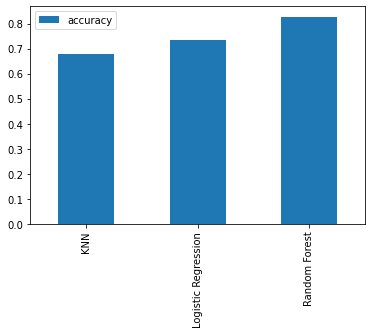

In [62]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Looking at the graph, Random Forest model performs best.



We now need to put together a **classification report** to show the team, and be sure to include a **confusion matrix**, and the **cross-validated precision**, **recall** and **F1 scores**. I'd also be curious to see what **features are most important**. Oh and don't forget to include a **ROC curve**.

Alright, there were a few words in there which could sound made up to someone who's not a budding data scientist like yourself. But being the budding data scientist you are, you know data scientists make up words all the time.

Let's briefly go through each before we see them in action.

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter tuning and cross-validation

To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favourite dish, they set use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it **overfits** (does too well) the data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a **validation set** but since we don't have much data, we'll use **cross-validation**.

The most common type of cross-validation is *k-fold*. It involves splitting your data into *k-fold's* and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

| <img src="images/cv.png" width=500/> | 
|:--:| 
| 5-fold cross-validation |

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like **precision**, **recall**, **F1-score** and **ROC** at the same time.

Here's the game plan:
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

## Tune Random Forest model by hand 

In [72]:
# Show number of parameters in use
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


There's one main hyperparameter we can tune for the Random Forest Classifier algorithm, and that is number of trees. The default is 100 (`n_estimators=100`).

In [91]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

forest = range(100, 500, 5) 

for i in forest:
    rf.set_params(n_estimators = i) # set neighbors value

    # Fit the algorithm
    rf.fit(X_train, y_train)

    # Update the training scores
    train_scores.append(rf.score(X_train, y_train))

    # Update the test scores
    test_scores.append(rf.score(X_val, y_val))


In [108]:
max(test_scores)

0.8401695647054206

Looking at the score, looks like higher n_estimators produced the best result. After trying out few different combination, i got the n_estimator value to 205 that gave me score of 84%.  

Doing tuning by hand is a very time consuming task, Let's look at couple of more efficient way to fine tune hyper parameters 

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [110]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use `RandomizedSearchCV` to try and tune our `RandomForestClassifier` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [111]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [112]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [114]:
# Evaluate the randomized search random forest model
rs_rf.score(X_val, y_val)

0.8445002682157763

Excellent! Tuning the hyperparameters for RandomForestClassifier model saw a slight performance boost.

we can try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:
* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

for this example we have tried manual and RandomizedSearchCV and we have not seen any significant improvements in the score. i don't think GridSearch will bring any much improvement either, we will not do the GridSearch but if you want you can certainly try that one also.


**Note:** If there are a large amount of hyperparameters combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.


## Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [118]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_val)

In [119]:
y_preds, y_val

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 1, 0]))

Since we've got our prediction values we can find the metrics we want.

Let's start with the ROC curve and AUC scores.

### ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `plot_roc_curve` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`plot_roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) function we can see it takes `(estimator, X, y)` as inputs. Where `estiamator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the RandomizedSearchCV version of our `RandomForestClassifier` estimator, `rs_rf` as well as the test data, `X_val` and `y_val`.

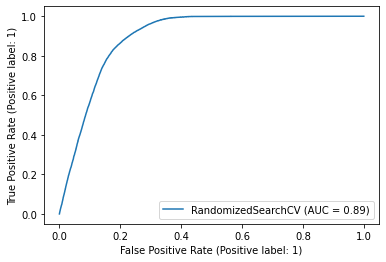

In [120]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X_val, y_val);

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

### Confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

In [122]:
# Display confusion matrix
print(confusion_matrix(y_val, y_preds))

[[60429  3479]
 [ 8406  4117]]


As you can see, Scikit-Learn's built-in confusion matrix is a bit bland. For a presentation you'd probably want to make it visual.

Let's create a function which uses Seaborn's [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for doing so.

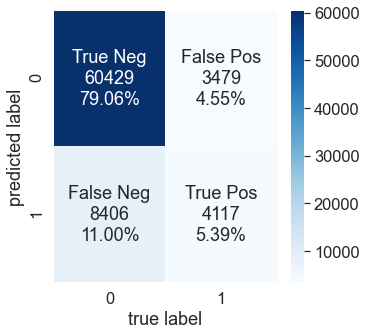

In [146]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size



def plot_conf_mat(y_val, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    cf_matrix = confusion_matrix(y_val, y_preds)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(cf_matrix,
                     annot=labels, # Annotate the boxes
                     cbar=True,
                    fmt='',
                    cmap='Blues')
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_val, y_preds)

You can see the model gets confused (predicts the wrong label), false negatives 11% and false positives are 4.5% that are the one our model got it wrong which is showing rest of 84% are predicted correctly.

### Classification report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels. 

A classification report will also give us information of the precision and recall of our model for each class.

In [147]:
# Show classification report
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     63908
           1       0.54      0.33      0.41     12523

    accuracy                           0.84     76431
   macro avg       0.71      0.64      0.66     76431
weighted avg       0.82      0.84      0.83     76431



What's going on here?

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined `scoring` parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [149]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [154]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

rs_clf = RandomForestClassifier(n_estimators= 460,
                                 min_samples_split= 6,
                                 min_samples_leaf= 9,
                                 max_depth= None)

In [155]:
# Cross-validated accuracy score
cv_acc = cross_val_score(rs_clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring

cv_acc

array([0.84442177, 0.84544229, 0.84464419, 0.84234146, 0.84434123])

In [156]:
#Since there are 5 metrics here, we'll take the average.
cv_acc = np.mean(cv_acc)
cv_acc

0.844238186969233

Now we'll do the same for other classification metrics.

In [158]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(rs_clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.5400800399483259

In [160]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(rs_clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.33186370986200053

In [161]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(rs_clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.4111264269209146

Okay, we've got cross validated metrics, Let's visualize them.

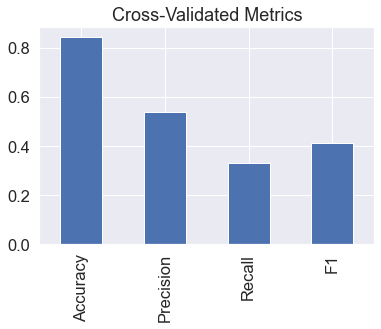

In [162]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

This looks good to understand how hyper parameter drive some of the key metrics. 

What now?

The final thing to check off the list of our model evaluation techniques is feature importance.

## Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict whether customer can be interested in buying vehicle insurance using a customer's driving characteristics, which characteristics contribute most to a model predicting whether someone has interested in buying vehicle insurance?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using `RandomizedForestClassifier`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `feature_importances_` attribute. Looking at the attribute is the coefficient of the features in the decision function.

We can access the `feature_importances_` attribute after we've fit an instance of `RandomizedForestClassifier`.

In [165]:
# Fit an instance of LogisticRegression (taken from above)
rs_clf.fit(X_train, y_train);

In [167]:
# Check feature_importances_
rs_clf.feature_importances_

array([0.0051012 , 0.19695736, 0.00087318, 0.04925842, 0.20076883,
       0.03823625, 0.26793627, 0.07526592, 0.09211701, 0.07348557,
       0.        , 0.        , 0.        ])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of customer driving data leans more towards having customer interested in buying vehicle insurance or not.

Even knowing this, in it's current form, this `feature_importances_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [169]:
# Match features to columns
features_dict = dict(zip(df.columns, list(rs_clf.feature_importances_)))
features_dict

{'id': 0.005101198983765521,
 'Gender': 0.19695736037491093,
 'Age': 0.0008731773091856333,
 'Driving_License': 0.049258420617960666,
 'Region_Code': 0.20076882700171203,
 'Previously_Insured': 0.03823624715968507,
 'Vehicle_Age': 0.26793626614317734,
 'Vehicle_Damage': 0.07526592113255567,
 'Annual_Premium': 0.09211701143319138,
 'Policy_Sales_Channel': 0.07348556984385571,
 'Vintage': 0.0,
 'Response': 0.0,
 'Gender_is_missing': 0.0}

Now we've match the feature coefficients to different features, let's visualize them. 

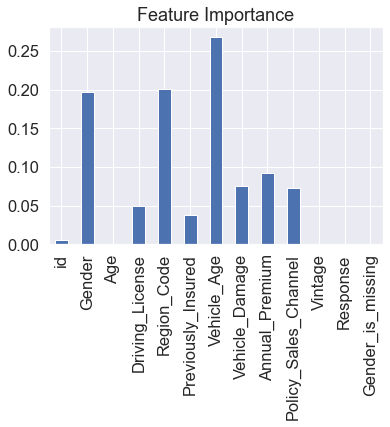

In [170]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

## Identify And Select Most Important Features

In [172]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(rs_clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(min_samples_leaf=9,
                                                 min_samples_split=6,
                                                 n_estimators=460),
                threshold=0.15)

In [173]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(df.columns[feature_list_index])

Gender
Region_Code
Vehicle_Age


What next?
You might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of RandomForestClassifier) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

Could you collect more data?

Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.

Could you improve the current models (beyond what we've done so far)?

The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimise your times between experiments.

## Save the model

If your model is good enough, how would you export it and share it with others? (Hint: check out Scikit-Learn's documentation on model persistance)

In [179]:
#  Saves a given model in a models directory and appends a suffix (str)
#  for clarity and reuse.

import os
import datetime
import joblib

# Create model directory with current time
modeldir = os.path.join("models/Vehicle_Insurance_Prediction",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
model_path = modeldir + "-" + "rf_hyper" + ".h5" # save format of model
print(f"Saving model to: {model_path}...")
joblib.dump(rs_clf, model_path)

Saving model to: models/Vehicle_Insurance_Prediction/20210328-13501616919647-rf_hyper.h5...


['models/Vehicle_Insurance_Prediction/20210328-13501616919647-rf_hyper.h5']

In [ ]:
# load the model from disk
loaded_model = joblib.load(model_path)
result = loaded_model.score(X_val, y_val)
print(result)

# -- End of Project --  